In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import scipy
import math

from scipy import stats
from statsmodels.stats import multitest
from statsmodels.stats.multicomp import pairwise_tukeyhsd
colormap = 'colorblind'
colors = sns.color_palette(colormap, 8)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 12, 'axes.titlesize':'medium',})

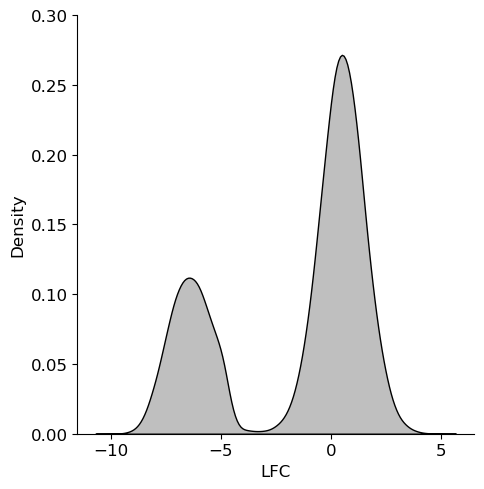

In [3]:
#Read output file from MAGeCK analysis: sgRNA summary
#Plot distribution of guide mRNA/gDNA ratios

data = pd.read_csv('threshold.sgrna_summary.csv')
sns.displot(data=data, x="LFC", kind="kde", bw_adjust=.75, color="black",fill=True)
plt.ylim(0,0.3)
plt.savefig('Figures/distribution_gRNAs.pdf', format='pdf', bbox_inches = "tight")

In [2]:
#Read output file from MAGeCK analysis: gene summary

#"UMI" column in thresholdedWithUMI.tsv represents UMI count for each gene, summed across all cells, from a
#previous single cell sequencing dataset generated from A549s after influenza infection. Genes with no 
#expression in A549s (UMI=0) were dropped from further analysis.
data = pd.read_csv('thresholdedWithUMI.tsv', sep = '\t')

data["-log(negscore)"] = np.log10(data['neg|score']) * (-1)
data["-log(posscore)"] = np.log10(data['pos|score']) * (-1)
data

,id,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc,UMI,-log(negscore),-log(posscore)
0,IRF3,15,2.093000e-07,0.000043,0.79826,1,15,-4.96760,1.000000,1.000000,1.000000,20484,0,-4.96760,2942,6.679231,-0.000000
1,SECTM1,15,1.625000e-06,0.000126,0.79826,2,10,-1.95490,0.993840,0.998740,1.000000,20386,1,-1.95490,14,5.789147,0.002684
2,HOXB2,18,7.506400e-06,0.000393,0.79826,4,8,-0.12655,0.283210,0.690370,1.000000,11740,5,-0.12655,42,5.124568,0.547891
3,CADM2,15,8.960400e-06,0.000429,0.79826,5,7,0.11916,0.041286,0.209040,1.000000,3567,4,0.11916,1,5.047673,1.384197
4,HEY1,18,9.007300e-06,0.000452,0.79826,6,11,-6.55990,0.872420,0.985320,1.000000,19393,3,-6.55990,7,5.045405,0.059274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13954,CMPK2,12,9.997800e-01,0.999280,1.00000,20479,0,0.70502,0.006587,0.044298,1.000000,923,9,0.70502,118,0.000096,2.181332
13955,CYCS,9,9.997900e-01,0.999560,1.00000,20480,0,1.12910,0.002468,0.016305,0.913626,416,8,1.12910,20184,0.000091,2.607708
13956,RFESD,12,9.998100e-01,0.999360,1.00000,20481,0,1.24860,0.000899,0.007803,0.765810,208,9,1.24860,83,0.000083,3.046037
13957,GPR180,9,9.999200e-01,0.999820,1.00000,20483,0,1.12620,0.000082,0.000671,0.388717,43,9,1.12620,385,0.000035,4.086838


In [4]:
#Plot distribution of genes by median mRNA/gDNA ratio of its guides.
#Overlay plot of genes in the RIG-I pathway based on median mRNA/gDNA ratio and MAGeCK score (for depletion in mRNA).

RIGI_pathway = ['RNF135','DDX58','MAVS','TRAF3','IKBKG','TANK','AZI2','TBKBP1','TBK1','IKBKE','IRF3']
data['RIG-I'] = data['id'].isin(RIGI_pathway)

data_RIGI = data[data['RIG-I']].reset_index()

sns.displot(data=data, x="neg|lfc", kind="kde", bw_adjust=.75,color="black",fill=True)
plt.ylim(0,0.7)
ax2 = plt.twinx()
sns.scatterplot(data=data_RIGI, x="neg|lfc", y="-log(negscore)", hue = "neg|rank",palette = sns.color_palette("colorblind"), edgecolor='0',        
                linewidth=1, s=60, ax = ax2, alpha=1)
for line in range(0,data_RIGI.shape[0]):
     ax2.text(data_RIGI["neg|lfc"][line]-.2, data_RIGI["-log(negscore)"][line]+0.1, 
     data_RIGI['id'][line], horizontalalignment='right', 
     size='large', color='black')
ax2.get_legend().set_visible(False)
ax2.set_ylim(-0.1,7)


plt.savefig('Figures/distribution_RIG-I.pdf', format='pdf', bbox_inches = "tight")

,id,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc,UMI,-log(negscore),-log(posscore),RIG-I
0,IRF3,15,2.093000e-07,0.000043,0.79826,1,15,-4.96760,1.000000,1.000000,1.000000,20484,0,-4.96760,2942,6.679231,-0.000000,True
1,SECTM1,15,1.625000e-06,0.000126,0.79826,2,10,-1.95490,0.993840,0.998740,1.000000,20386,1,-1.95490,14,5.789147,0.002684,False
2,HOXB2,18,7.506400e-06,0.000393,0.79826,4,8,-0.12655,0.283210,0.690370,1.000000,11740,5,-0.12655,42,5.124568,0.547891,False
3,CADM2,15,8.960400e-06,0.000429,0.79826,5,7,0.11916,0.041286,0.209040,1.000000,3567,4,0.11916,1,5.047673,1.384197,False
4,HEY1,18,9.007300e-06,0.000452,0.79826,6,11,-6.55990,0.872420,0.985320,1.000000,19393,3,-6.55990,7,5.045405,0.059274,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13954,CMPK2,12,9.997800e-01,0.999280,1.00000,20479,0,0.70502,0.006587,0.044298,1.000000,923,9,0.70502,118,0.000096,2.181332,False
13955,CYCS,9,9.997900e-01,0.999560,1.00000,20480,0,1.12910,0.002468,0.016305,0.913626,416,8,1.12910,20184,0.000091,2.607708,False
13956,RFESD,12,9.998100e-01,0.999360,1.00000,20481,0,1.24860,0.000899,0.007803,0.765810,208,9,1.24860,83,0.000083,3.046037,False
13957,GPR180,9,9.999200e-01,0.999820,1.00000,20483,0,1.12620,0.000082,0.000671,0.388717,43,9,1.12620,385,0.000035,4.086838,False


In [11]:
#Same plot of distribution of genes by median mRNA/gDNA ratio of its guides.
#This time overlay plot of NELF genes based on median mRNA/gDNA ratio and MAGeCK score (for enrichment in mRNA).

NELF = ['NELFB','NELFA','NELFCD']
data['NELF'] = data['id'].isin(NELF)

data_NELF = data[data['NELF']].reset_index()

sns.displot(data=data, x="pos|lfc", kind="kde", bw_adjust=.75,color="black",fill=True)
plt.ylim(0,0.7)
ax2 = plt.twinx()
sns.scatterplot(data=data_NELF, x="pos|lfc", y="-log(posscore)", color = sns.color_palette("colorblind")[0], edgecolor='0',        
                linewidth=1, s=60, ax = ax2, alpha=1)
for line in range(0,data_NELF.shape[0]):
     ax2.text(data_NELF["pos|lfc"][line]-.2, data_NELF["-log(posscore)"][line], 
     data_NELF['id'][line], horizontalalignment='right', 
     size='large', color='black')
ax2.set_ylim(0, 16)

plt.savefig('Figures/distribution_NELF.pdf', format='pdf', bbox_inches = "tight")

,id,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc,UMI,-log(negscore),-log(posscore),NELF
0,IRF3,15,2.093000e-07,0.000043,0.79826,1,15,-4.96760,1.000000,1.000000,1.000000,20484,0,-4.96760,2942,6.679231,-0.000000,False
1,SECTM1,15,1.625000e-06,0.000126,0.79826,2,10,-1.95490,0.993840,0.998740,1.000000,20386,1,-1.95490,14,5.789147,0.002684,False
2,HOXB2,18,7.506400e-06,0.000393,0.79826,4,8,-0.12655,0.283210,0.690370,1.000000,11740,5,-0.12655,42,5.124568,0.547891,False
3,CADM2,15,8.960400e-06,0.000429,0.79826,5,7,0.11916,0.041286,0.209040,1.000000,3567,4,0.11916,1,5.047673,1.384197,False
4,HEY1,18,9.007300e-06,0.000452,0.79826,6,11,-6.55990,0.872420,0.985320,1.000000,19393,3,-6.55990,7,5.045405,0.059274,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13954,CMPK2,12,9.997800e-01,0.999280,1.00000,20479,0,0.70502,0.006587,0.044298,1.000000,923,9,0.70502,118,0.000096,2.181332,False
13955,CYCS,9,9.997900e-01,0.999560,1.00000,20480,0,1.12910,0.002468,0.016305,0.913626,416,8,1.12910,20184,0.000091,2.607708,False
13956,RFESD,12,9.998100e-01,0.999360,1.00000,20481,0,1.24860,0.000899,0.007803,0.765810,208,9,1.24860,83,0.000083,3.046037,False
13957,GPR180,9,9.999200e-01,0.999820,1.00000,20483,0,1.12620,0.000082,0.000671,0.388717,43,9,1.12620,385,0.000035,4.086838,False


In [3]:
#Infection is required for interferon induction.
#Here we list genes we expect to be required for flu infection based on a screen performed by Li et al.
#(https://doi.org/10.1038/s41467-019-13965-x)

#list of 121 essential flu genes
essential = ["AARS","ACTB","AFG3L2","ALG2","ANKLE2","ATP6AP1","ATP6AP2",
 "ATP6V0B","ATP6V0C","ATP6V0D1","ATP6V1A","ATP6V1B2","ATP6V1C1","ATP6V1D",
 "ATP6V1E1","ATP6V1F","ATP6V1G1","ATP6V1H","BET1","BRF2","CCDC115","CCT4","CDK1",
 "CHMP6","CMTR1","COG1","COG2","COG3","COG4","COG8","COPA","COPG1","CSE1L","DAD1",
 "DBR1","DPAGT1","DYRK1A","EEF2", "EIF2B4","ENY2","EXOC2","EXOC3","EXOC4","FAM25A","GGPS1",
 "GOSR2","HAUS8","MBTPS1","MCM3AP","MYH9","NCBP2","NSF","NUDT21","NUP153","NUP85","NXF1",
 "PAXBP1","PCID2","PKD1","PLA2G10","PLLP","POLE2","POLR3A","POLR3H","POP7","PREB","RABGGTA",
 "RABGGTB","RARS2","RCC1","RNASEK","RPL6","RPLP0","RPN1","RPN2","RRP12","SARS","SART3","SCAP",
 "SCFD1","SCRT1","SEC13","SEC16A","SEZ6L","SFPQ","SFSWAP","SLC26A10","SLC35A1","SLC39A7","SMARCB1",
 "SNX18","SOCS3","SPCS3","SRP14","SRP19","SRP54","SRP9","SRPRB","SRRT","SYS1","TBP","TMEM199","TMEM258",
 "TMEM38A","TOP2A","TPR","TRAPPC1","TRAPPC11","TRAPPC3","TRAPPC4","TRAPPC5","TRAPPC8","TTC27",
 "TUBGCP2","TWISTNB","VHL","VPS13D","VPS54","WDR7","YKT6","ZSCAN20"]

#entry:
#includes endocytosis (V-type ATPase), sialic acid production, COP-1 pathway
entry = ["ATP6AP1","ATP6AP2", "ATP6V0B","ATP6V0C","ATP6V0D1","ATP6V1A","ATP6V1B2","ATP6V1C1","ATP6V1D",
              "ATP6V1E1", "ATP6V1F","ATP6V1G1","ATP6V1H", "CHMP6",'SLC35A1', 'WDR7', 'CCDC115','TMEM199', 
             'COPG1','COPA','RABGGTA','RABGGTB','GGPS1','VPS54']

#replication:
#nuclear import, viral transcription, nuclear export, CMTR1 (shown in that study to be important for cap-snatching)
replication = ['NUP85', 'NUP153', 'TPR', 'RCC1', 'POLE2', 'TWISTNB', 'NXF1', 'ANKLE2', 'CMTR1']

#RIG-I pathway
ifn = ['RNF135','DDX58','MAVS','TRAF3','IKBKG','TANK','AZI2','TBKBP1','TBK1','IKBKE','IRF3']

In [1]:
graph = data.copy()
graph['category'] = 'all'
essential = graph.loc[graph.id.isin(essential),].copy()
entry = graph.loc[graph.id.isin(entry),].copy()
rep = graph.loc[graph.id.isin(replication),].copy()
ifn = graph.loc[graph.id.isin(ifn),].copy()
essential['category'] = 'essential'
entry['category'] = 'early' #combined entry and replication into a single "early" category
rep['category'] = 'early'
ifn['category'] = 'RIG_I'

graph = pd.concat([graph,essential,entry,rep,ifn])

sns.violinplot(data=graph, y='neg|lfc', x='category', density_norm='width', order=['all','essential','early','RIG_I'], 
               inner='quart',color='0.8',inner_kws=dict(color='0'))
sns.stripplot(data=graph[graph.category != 'all'], y='neg|lfc', x='category', jitter=True, size = 4, 
                   color = sns.color_palette("colorblind")[0], alpha = 0.5)
plt.savefig('Figures/pathway_violin.pdf', format='pdf', bbox_inches = "tight")

NameError: name 'data' is not defined

In [8]:
stat, pval = scipy.stats.f_oneway(*[graph[graph.category == category]['neg|lfc'] for category in set(graph.category)])
if pval < 0.05:
    tukey = pairwise_tukeyhsd(endog=graph['neg|lfc'],
                              groups=graph['category'],
                              alpha=0.05)
    print(tukey)
else:
    print('No significant difference detected by ANOVA at a pvalue of 0.05')

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
 RIG_I       all   1.9101 0.0012   0.585  3.2351   True
 RIG_I     entry   0.2006 0.9873 -1.3478  1.7491  False
 RIG_I essential   1.1091 0.1686 -0.2784  2.4966  False
   all     entry  -1.7094    0.0 -2.5123 -0.9065   True
   all essential   -0.801    0.0 -1.2159 -0.3861   True
 entry essential   0.9084 0.0477  0.0062  1.8107   True
-------------------------------------------------------
